In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/weather_ch_clean.csv', sep=',')
print(df.columns) 

Index(['region', 'time', 'weighted_fu3010d1', 'weighted_tre200dx',
       'weighted_tre200dn', 'weighted_tre200d0', 'weighted_rka150d0',
       'weighted_ure200dx', 'weighted_ure200dn', 'weighted_ure200d0',
       'weighted_sre000d0', 'weighted_fu3010d0'],
      dtype='object')


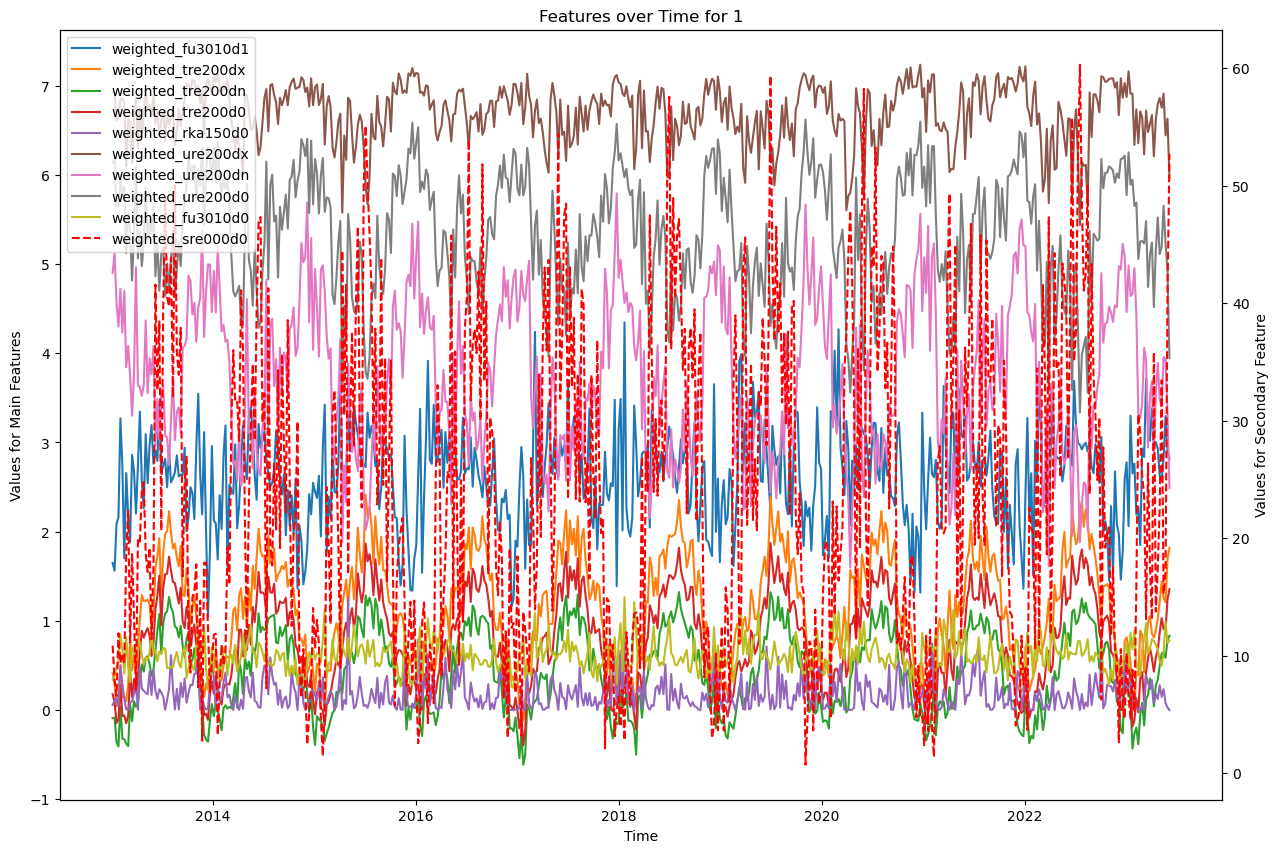

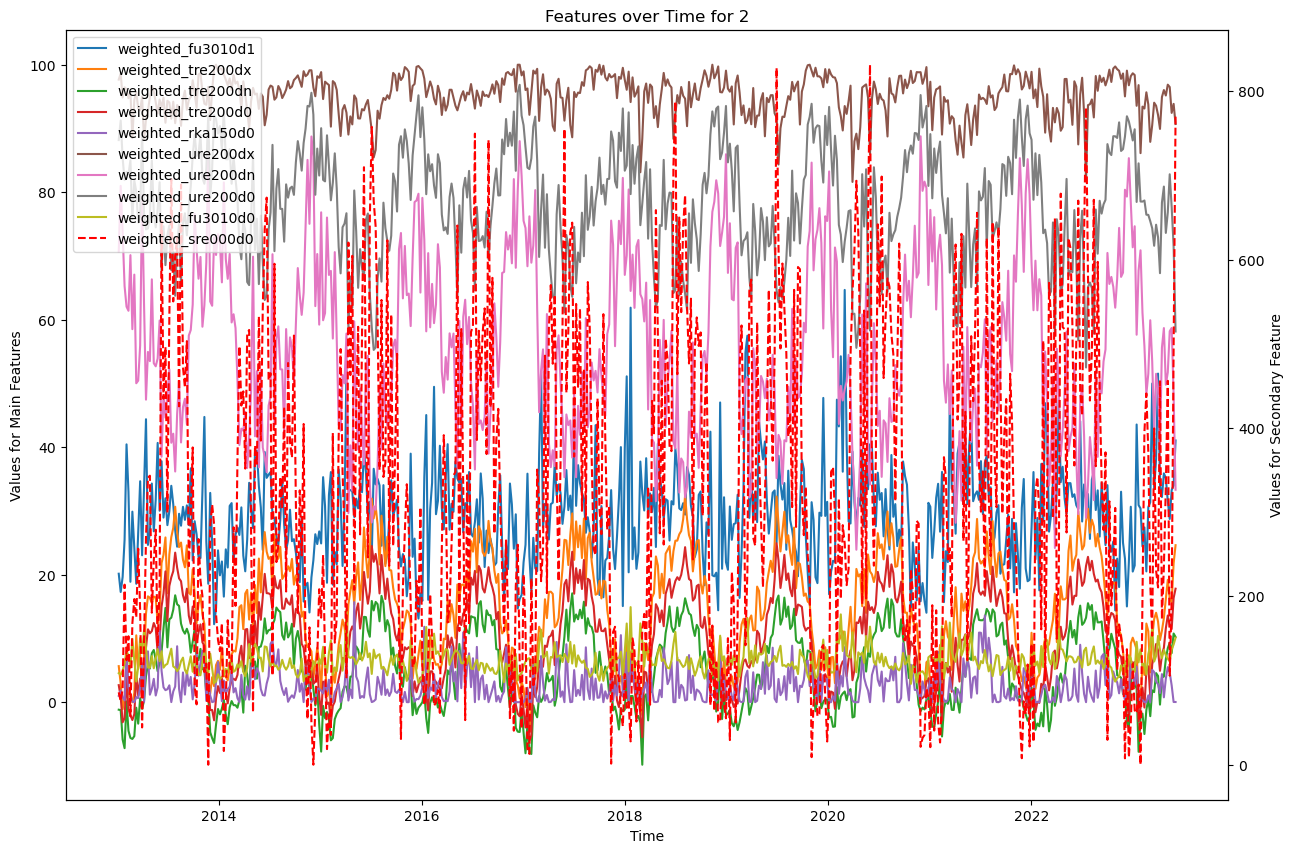

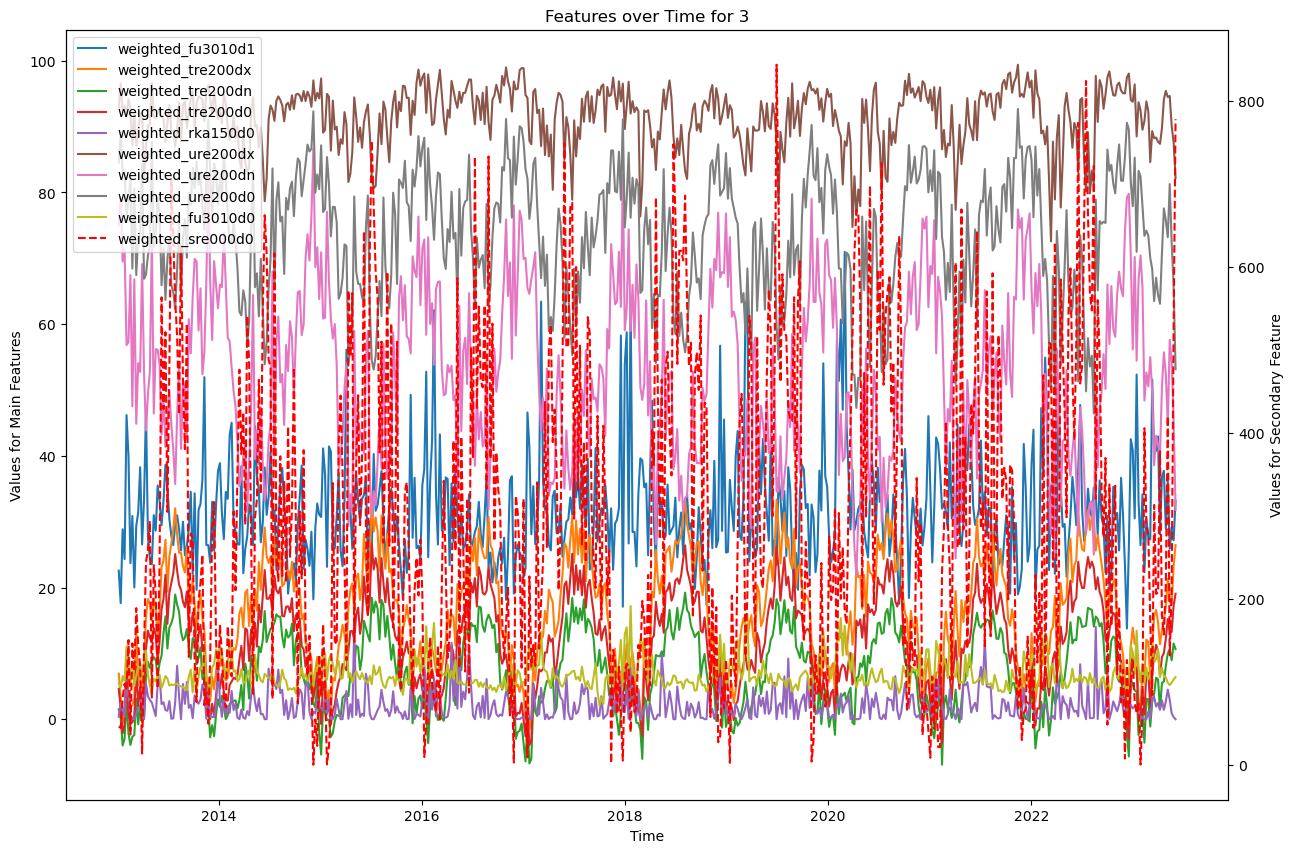

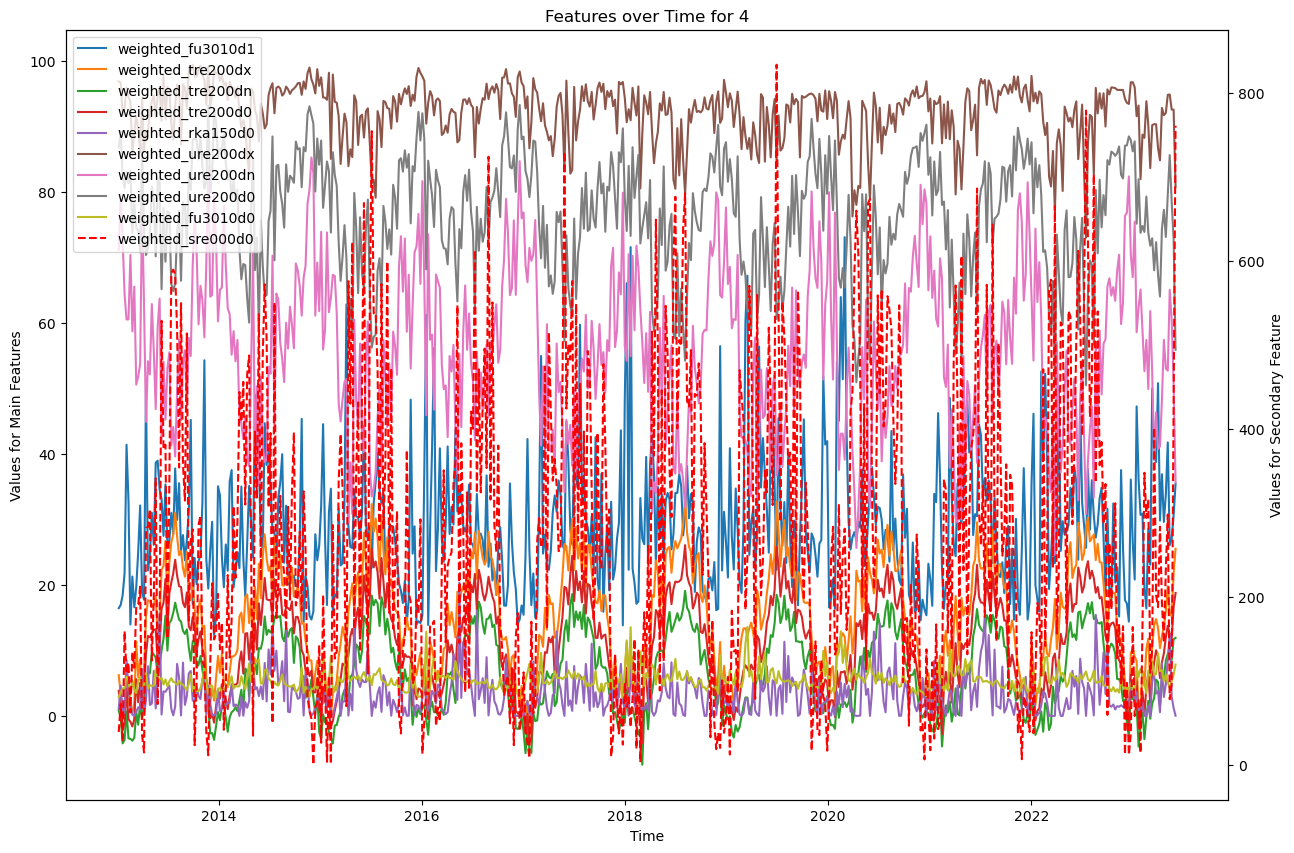

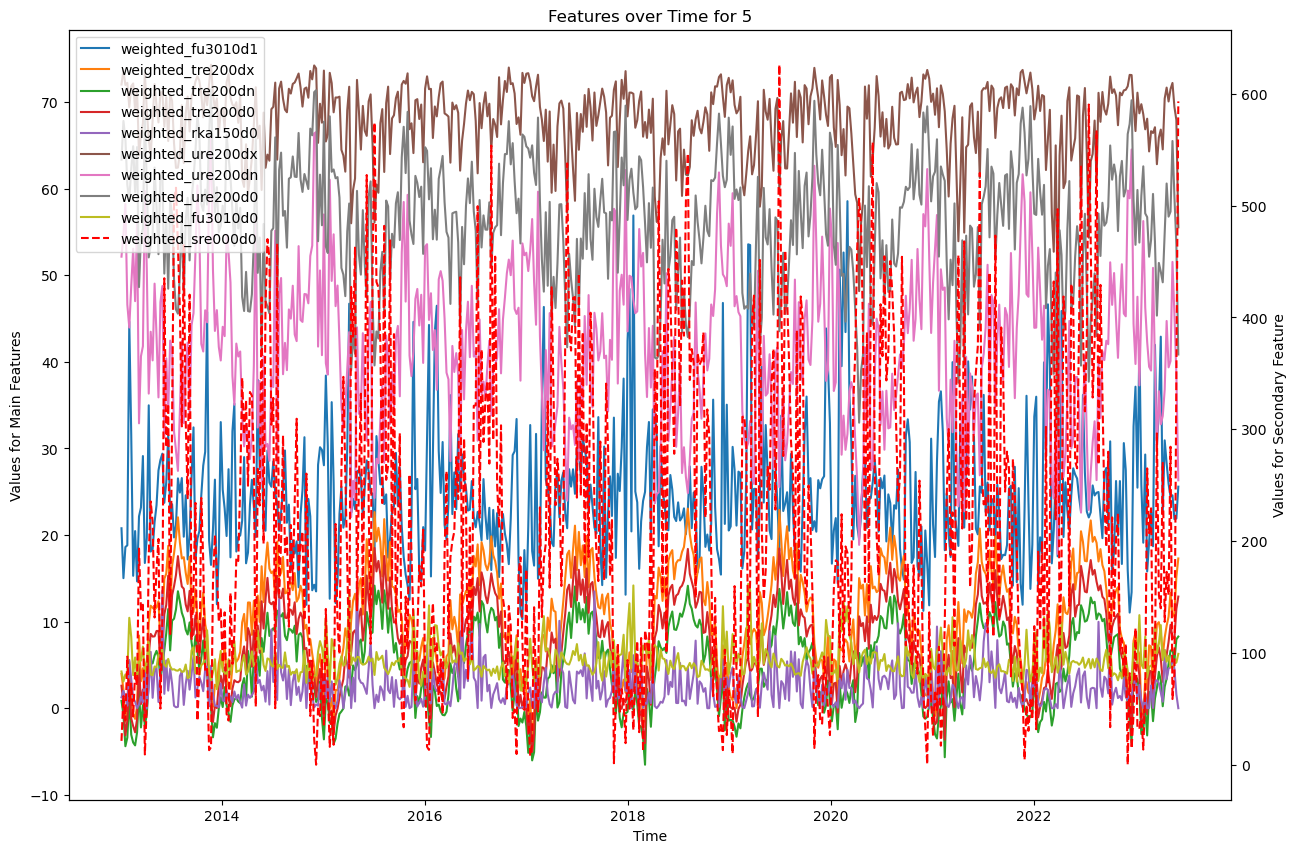

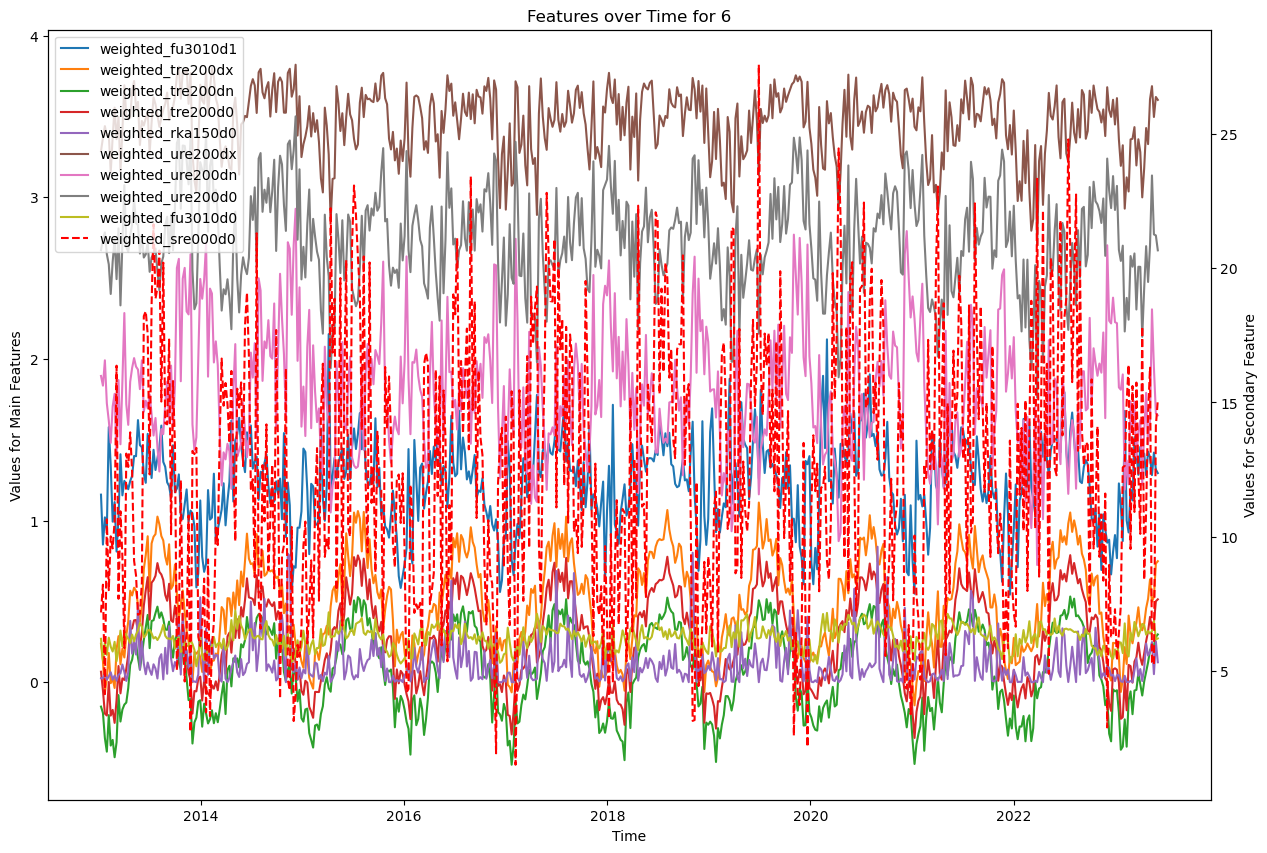

In [3]:
features = [
    'weighted_fu3010d1', 'weighted_tre200dx', 'weighted_tre200dn', 
    'weighted_tre200d0', 'weighted_rka150d0', 'weighted_ure200dx', 
    'weighted_ure200dn', 'weighted_ure200d0', 'weighted_fu3010d0'
]

secondary_feature = 'weighted_sre000d0'

df['time'] = pd.to_datetime(df['time'])

# Group the data by region
grouped_df = df.groupby('region')

# Plot each region
for region, group in grouped_df:
    plt.figure(figsize=(15, 10))
    plt.title(f'Features over Time for {region}')
    ax1 = plt.gca()  
    ax2 = ax1.twinx()  
    
    for feature in features:
        ax1.plot(group['time'], group[feature], label=feature)
    ax2.plot(group['time'], group[secondary_feature], label=secondary_feature, color='red', linestyle='--')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Values for Main Features')
    ax2.set_ylabel('Values for Secondary Feature')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()

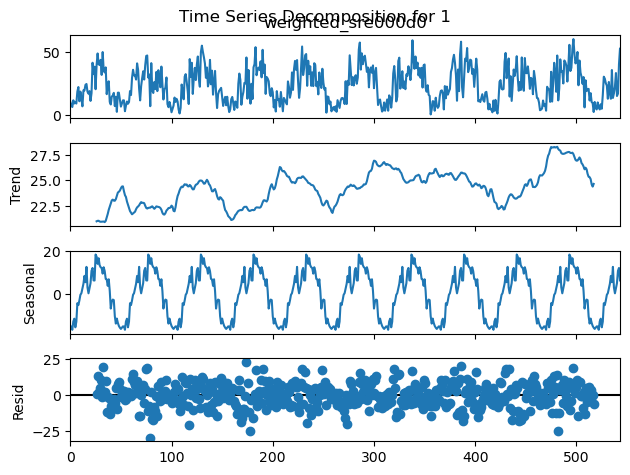

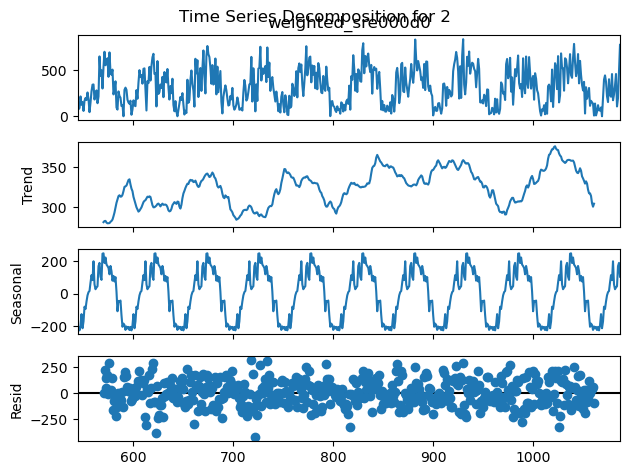

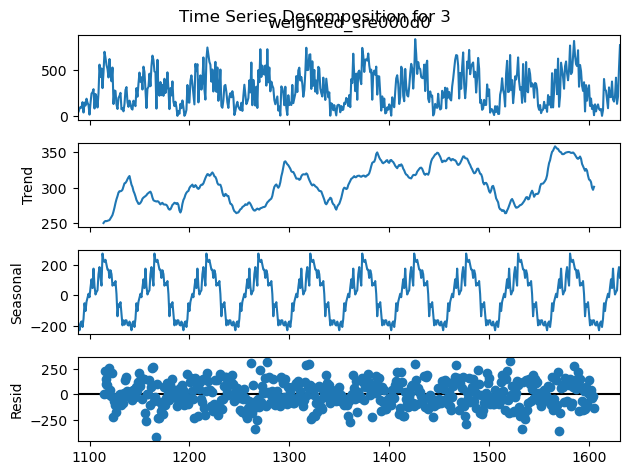

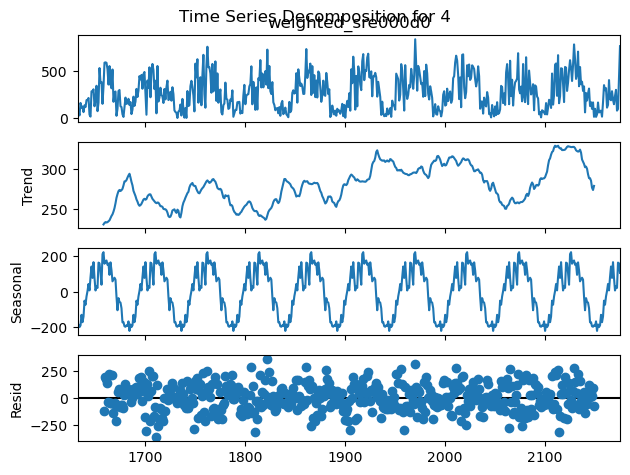

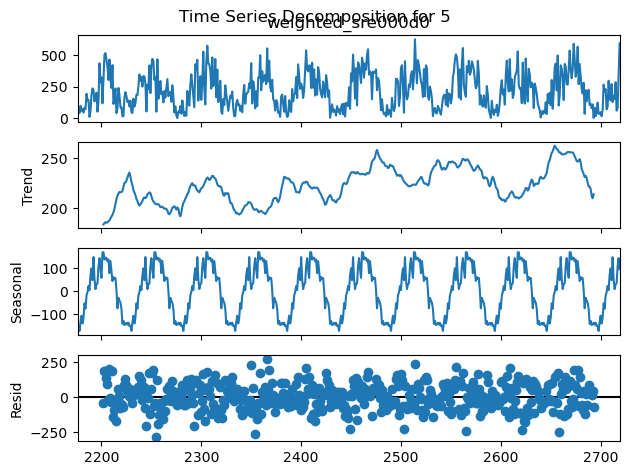

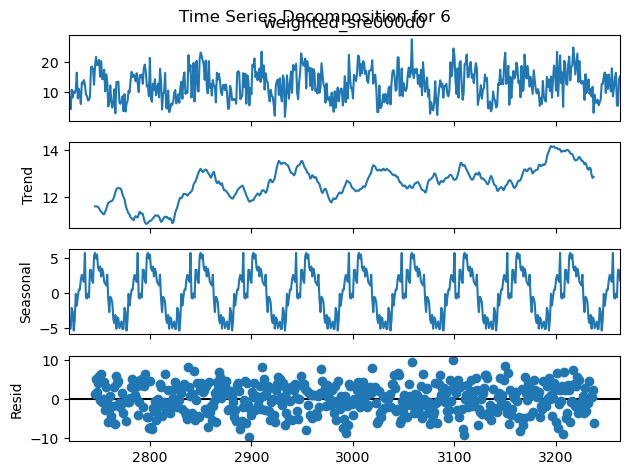

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

df['time'] = pd.to_datetime(df['time'])

# Ensure the DataFrame covers the full range of dates at weekly intervals
full_range = pd.date_range(start=df['time'].min(), end=df['time'].max(), freq='W')

df.ffill(inplace=True) 

# Loop through each region
for region in df['region'].unique():
    # Select the time series for the current region
    time_series = df[df['region'] == region]['weighted_sre000d0']

    if not time_series.empty and len(time_series) > 1:
        # Decompose the time series
        result = seasonal_decompose(time_series, model='additive', period=52)  # Weekly data, so period is 52

        # Plotting the decomposed time series
        result.plot()
        plt.suptitle(f'Time Series Decomposition for {region}')
        plt.show()
    else:
        print(f"No data available for region: {region}")

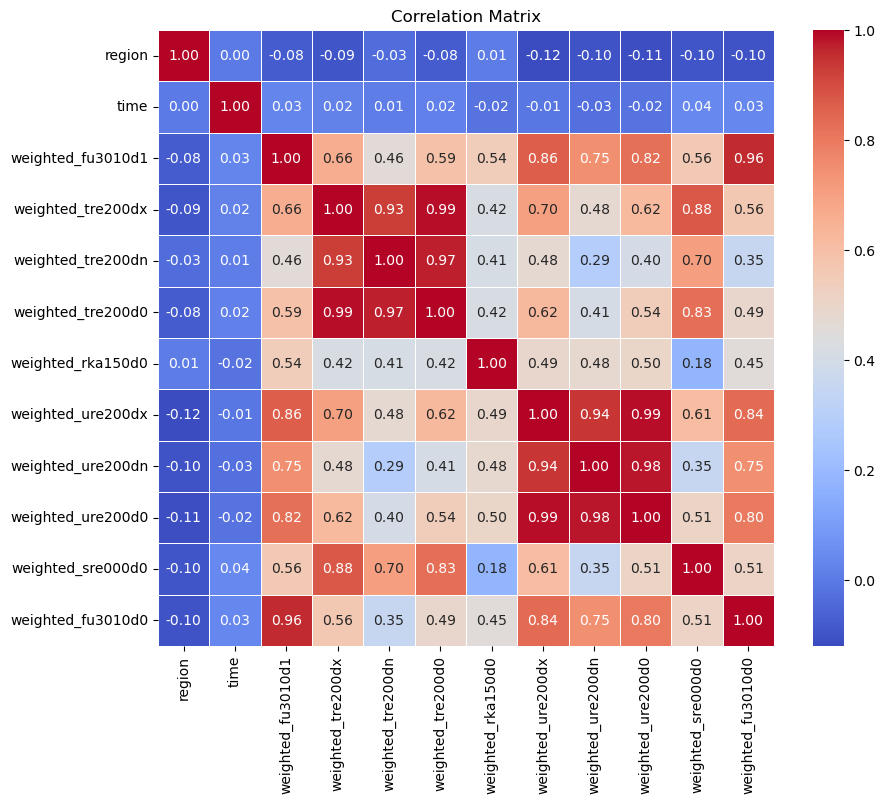

In [5]:
import seaborn as sns
# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()